# Set-up

In [1]:
# DATA MANIPULATION
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime # manipulating date formats
import random

# VIZUALIZATION
import matplotlib.pyplot as plt # basic plotting
import seaborn # for prettier plots
%matplotlib inline

# Read data

In [2]:
oil=pd.read_csv('../input/oil.csv', parse_dates=['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Apparently, since oil is a stock-like time series it only reports values on working days.  

# Missing data (oil)

In [3]:
tmp = pd.DataFrame({'date':pd.date_range(oil.date.min(), oil.date.max())})
oil = pd.merge(oil, tmp, how='right')
oil.sort_values('date', inplace=True)
oil.reset_index(inplace=True)
oil.head(10)

,index,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.14
2,2,2013-01-03,92.97
3,3,2013-01-04,93.12
4,1218,2013-01-05,NaN
5,1219,2013-01-06,NaN
6,4,2013-01-07,93.20
7,5,2013-01-08,93.21
8,6,2013-01-09,93.08
9,7,2013-01-10,93.81


In [4]:
oil.dcoilwtico.isnull().sum()

529

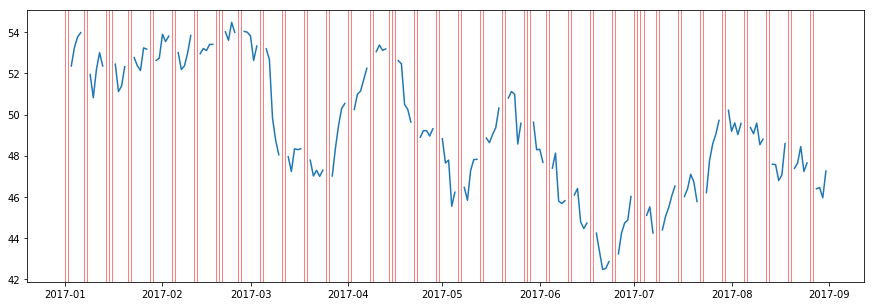

In [5]:
oil_ts = pd.Series(oil.dcoilwtico.values, index=oil.date)

afilter='2017'

plt.figure(figsize=(15,5))
plt.plot(oil_ts[afilter])

for date in oil_ts[oil_ts.isnull()][afilter].index:
    plt.axvspan(date, date, color='red', alpha=0.5)

plt.show()

# Imputation

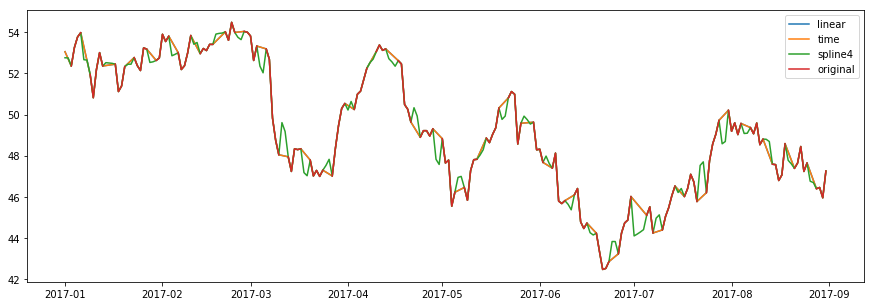

In [6]:
ts1 = oil_ts.interpolate() # linear
ts2 = oil_ts.interpolate(method='time')
ts3 = oil_ts.interpolate(method='spline', order=4)

plt.figure(figsize=(15,5))
plt.plot(ts1[afilter], label='linear')
plt.plot(ts2[afilter], label='time')
plt.plot(ts3[afilter], label='spline4')
plt.plot(oil_ts[afilter], label='original')
plt.legend()
plt.show()

In [7]:
# Compare interpolations

miss_dates = oil[oil.dcoilwtico.isnull()]['date']
miss_dates

pd.DataFrame({'linear':ts1[miss_dates], 
              'time':ts2[miss_dates],
              'spline':ts3[miss_dates]}).head(10)

,linear,spline,time
date,,,
2013-01-01,NaN,NaN,NaN
2013-01-05,93.146667,93.124121,93.146667
2013-01-06,93.173333,93.190043,93.173333
2013-01-12,93.823333,93.802024,93.823333
2013-01-13,94.046667,93.938715,94.046667
2013-01-19,95.730000,94.920230,95.730000
2013-01-20,95.850000,95.102492,95.850000
2013-01-21,95.970000,95.287115,95.970000
2013-01-26,95.416667,96.194667,95.416667


In [8]:
# Chose a method to replace the missing values

ts1[0] = ts1[1] # First record

oil = ts1.to_frame('dcoilwtico')
oil.reset_index(inplace=True)
oil.head(10)

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
5,2013-01-06,93.173333
6,2013-01-07,93.200000
7,2013-01-08,93.210000
8,2013-01-09,93.080000
9,2013-01-10,93.810000


In [9]:
oil.to_csv('../input/processed/oil.csv',index=False,float_format="%.3f")